In [1]:
from keras.models import load_model
model=load_model('cats_and_dogs_small_2.h5')
model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [2]:
img_path=r'D:\Cdeepmachine\train\cats_and_dogs\test\cats\cat.1700.jpg'

In [4]:
from keras.preprocessing import image
import numpy as np

In [6]:
img=image.load_img(img_path,target_size=(150,150))
img_tensor=image.img_to_array(img)
print(img_tensor.shape)
img_tensor=np.expand_dims(img_tensor,axis=0)
img_tensor/=255.
print(img_tensor.shape)

(150, 150, 3)
(1, 150, 150, 3)


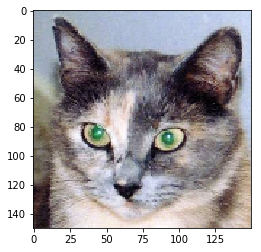

In [7]:
import matplotlib.pyplot as plt
plt.imshow(img_tensor[0])
plt.show()

In [8]:
from keras import models
layer_outputs=[layer.output for layer in model.layers[:8]]
activation_model=models.Model(inputs=model.input,outputs=layer_outputs)

In [9]:
activations=activation_model.predict(img_tensor)

In [10]:
first_layer_activation=activations[0]
print(first_layer_activation.shape)

(1, 148, 148, 32)


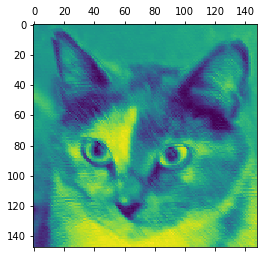

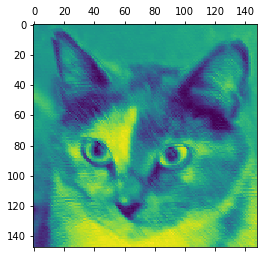

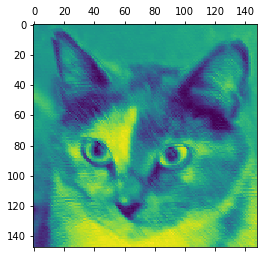

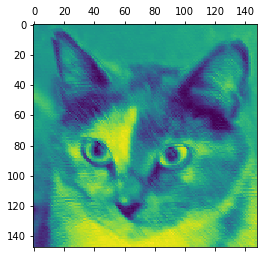

In [14]:
plt.matshow(first_layer_activation[0,:,:,4],cmap='viridis')
plt.show()

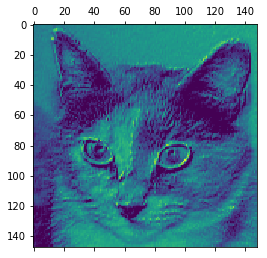

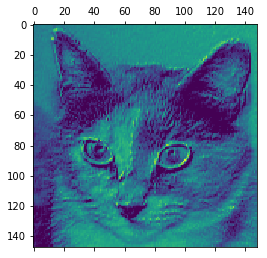

In [16]:
plt.matshow(first_layer_activation[0,:,:,7],cmap='viridis')
plt.show()

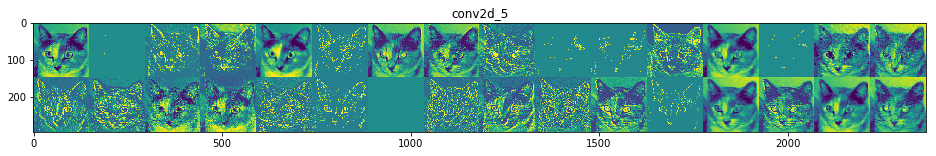

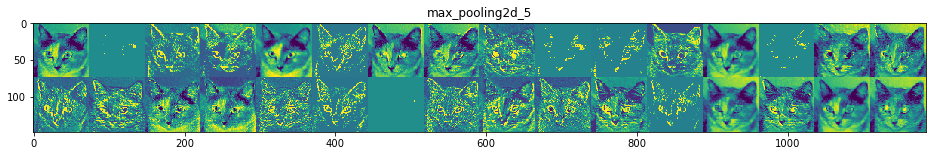

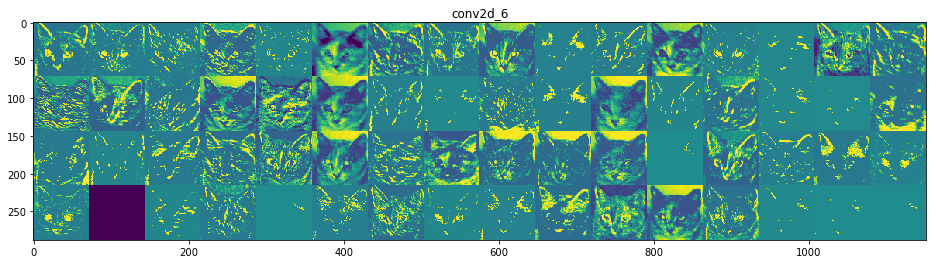

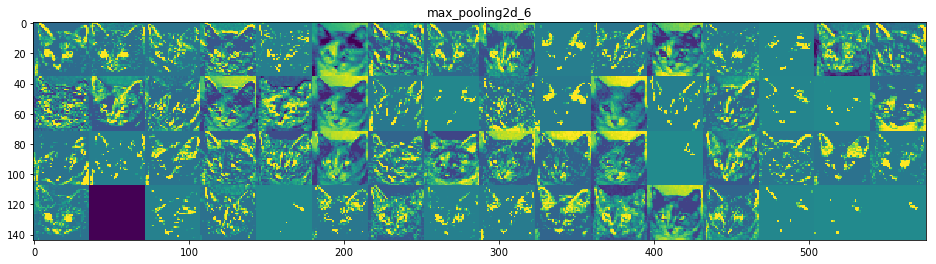

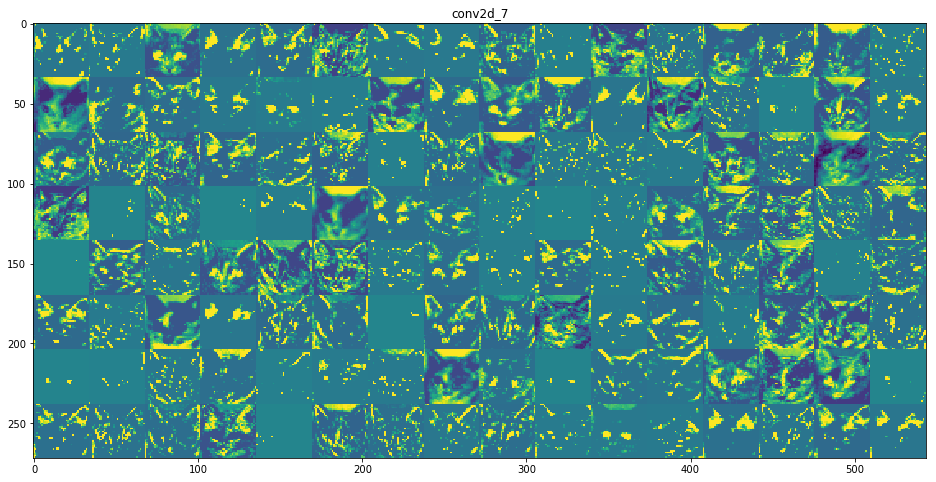

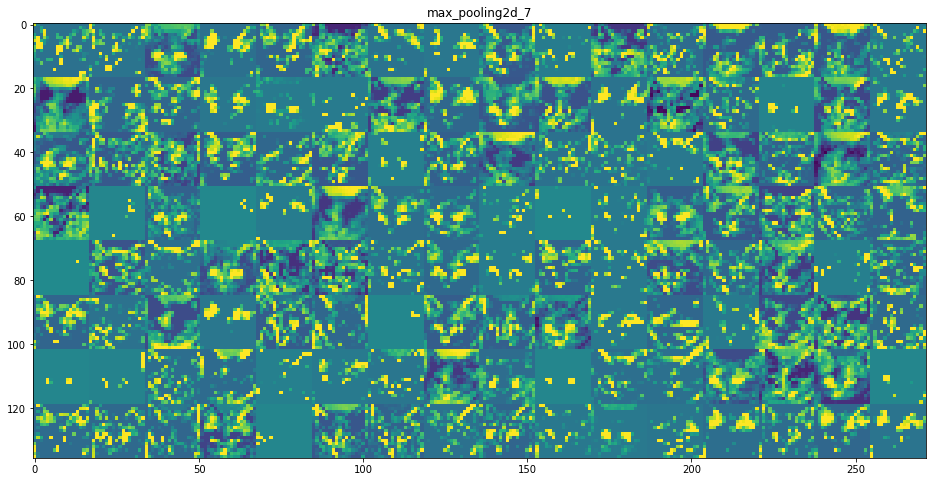

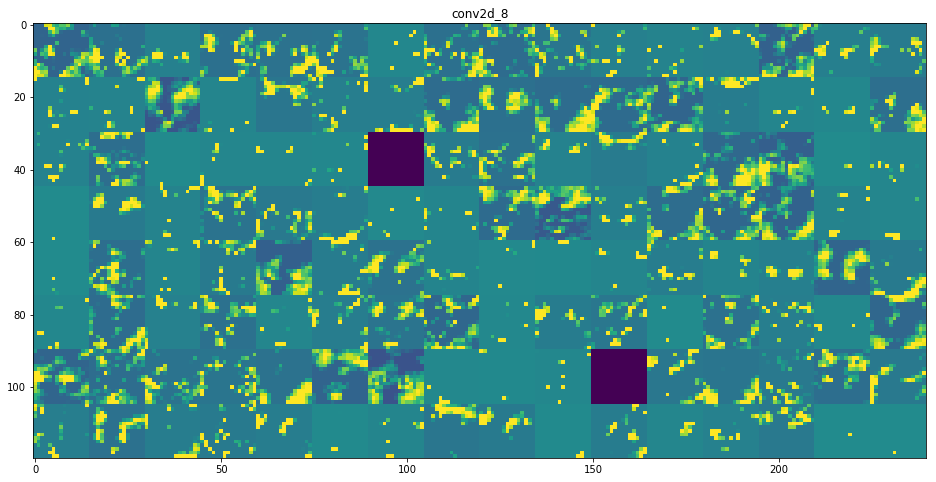

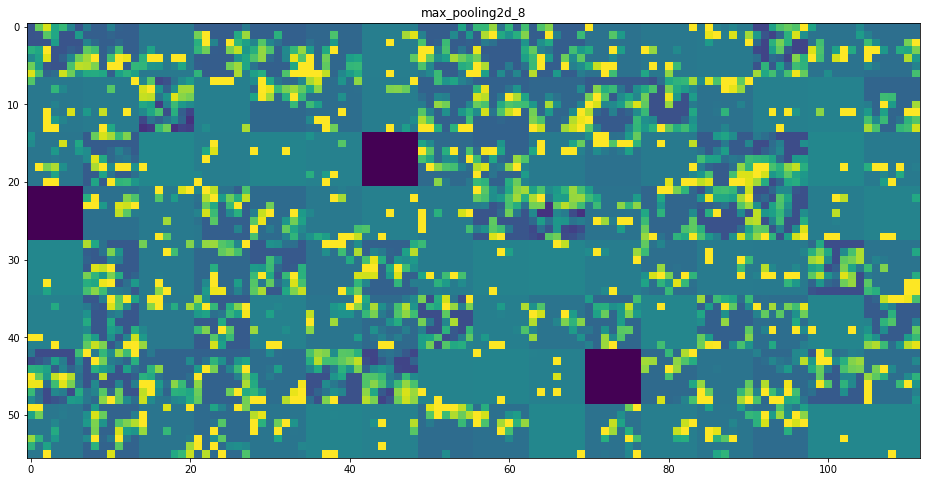

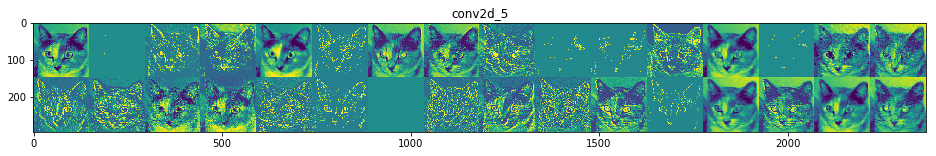

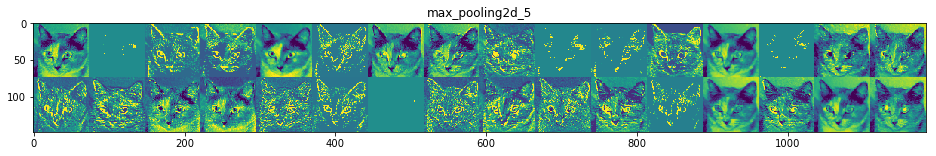

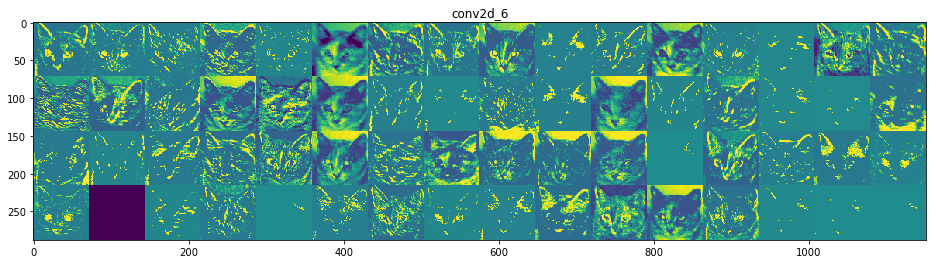

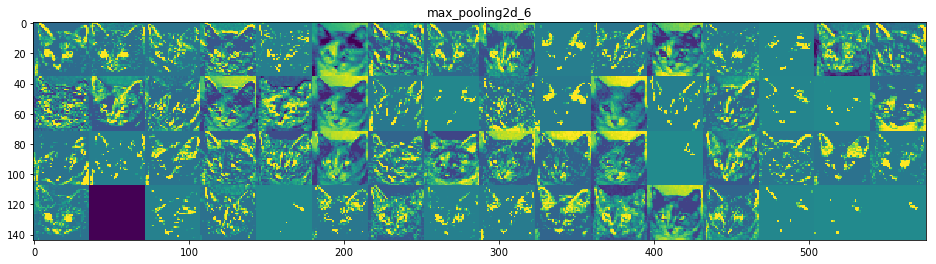

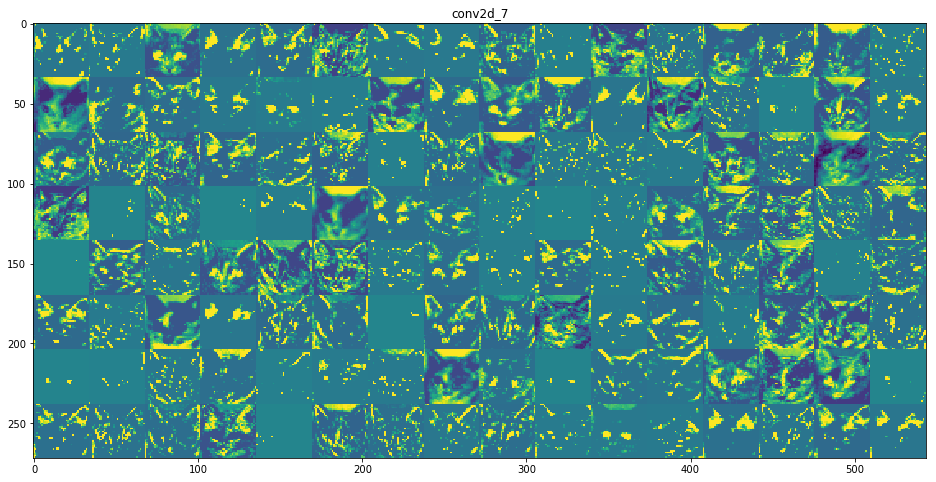

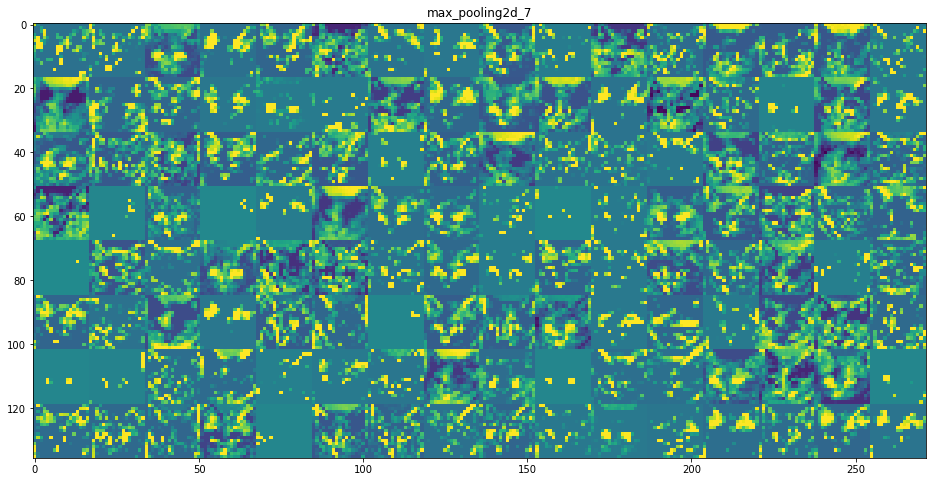

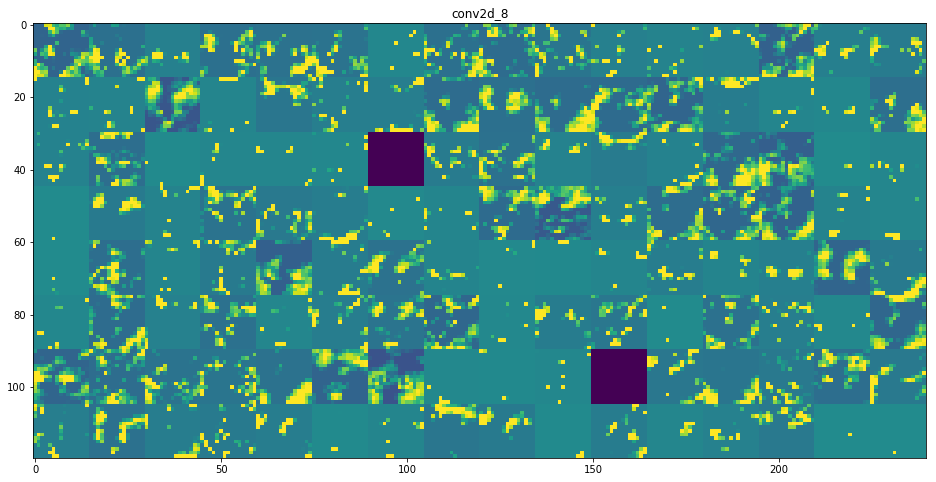

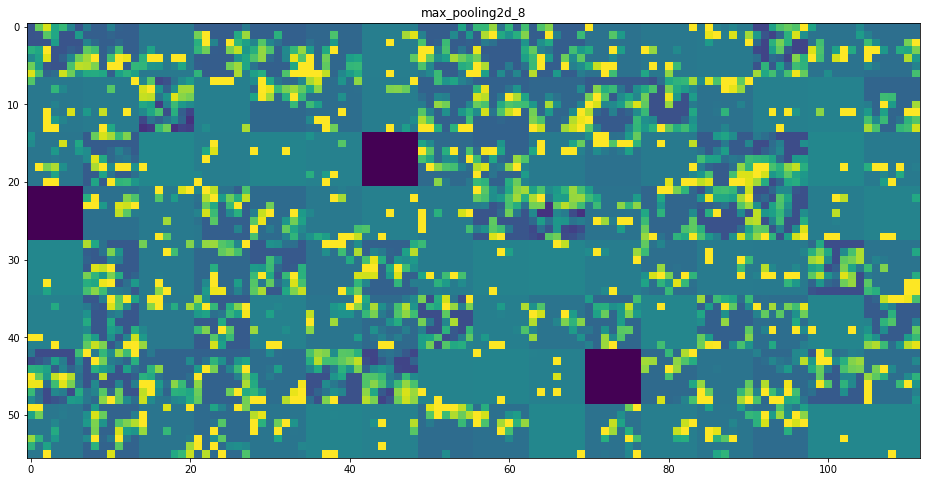

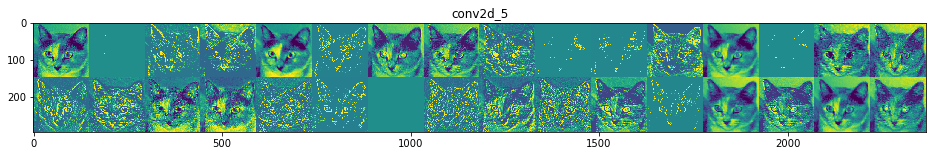

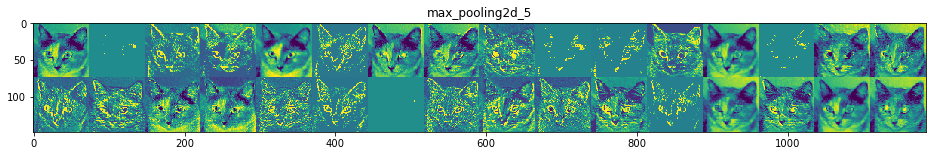

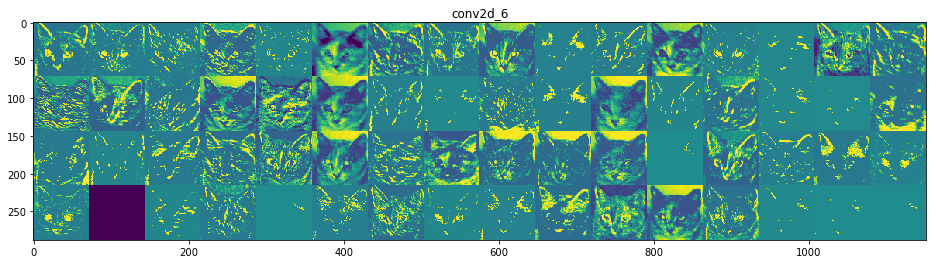

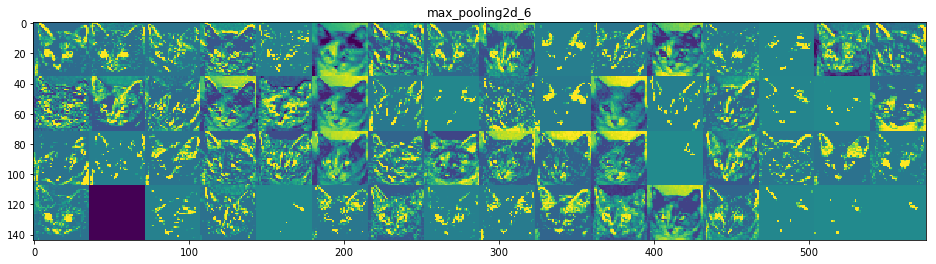

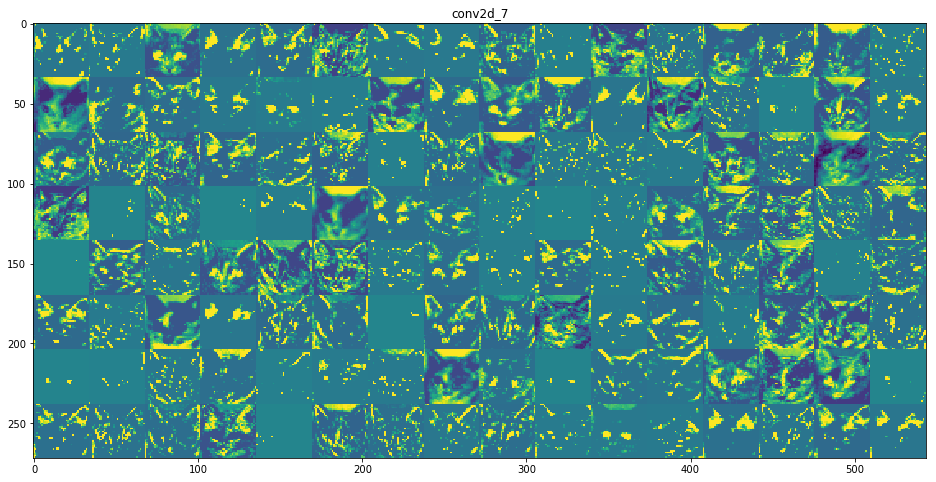

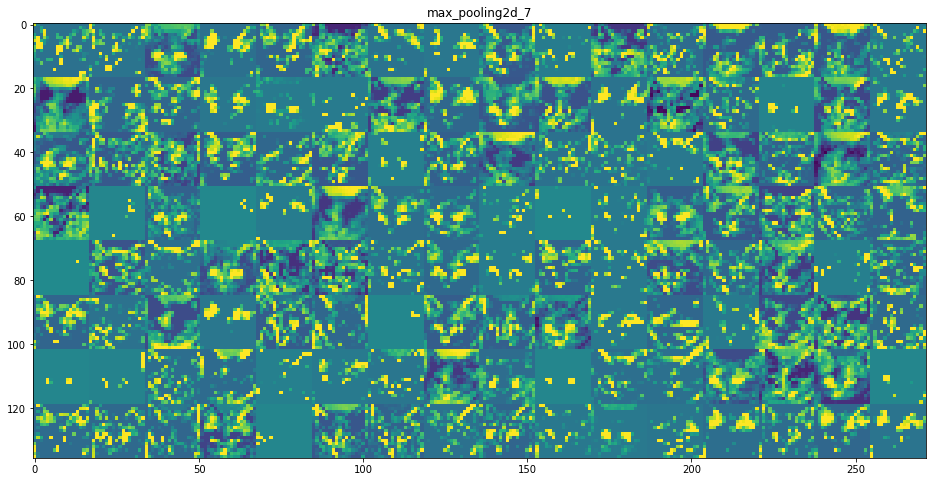

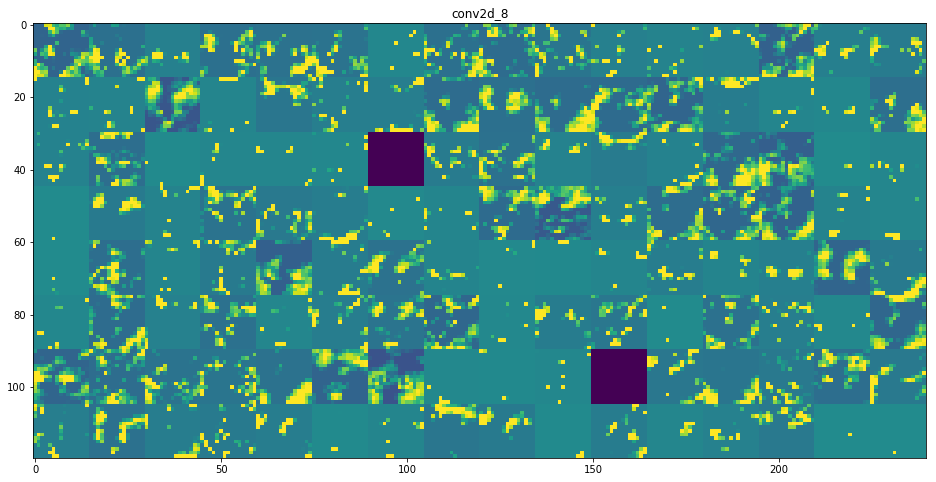

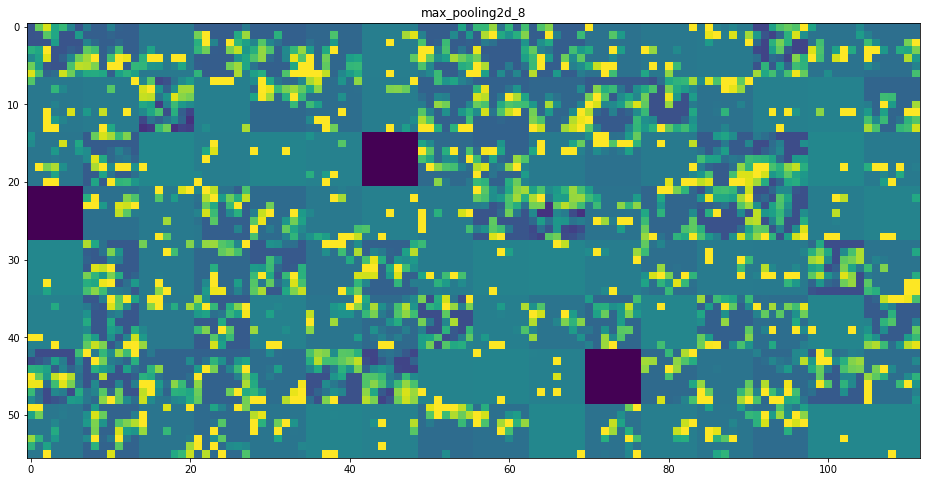

In [21]:
layer_names=[]
np.seterr(divide='ignore', invalid='ignore')
for layer in model.layers[:8]:
    layer_names.append(layer.name)
images_per_row=16
for layer_name,layer_activation in zip(layer_names,activations):
    n_features=layer_activation.shape[-1]
    size=layer_activation.shape[1]
    n_cols=n_features//images_per_row
    display_grid=np.zeros((size*n_cols,images_per_row*size))
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image=layer_activation[0,:,:,col*images_per_row+row]
            channel_image-=channel_image.mean()
            channel_image/=channel_image.std()
            channel_image*=64
            channel_image+=128
            channel_image=np.clip(channel_image,0,255).astype('uint8')
            display_grid[col*size:(col+1)*size,
                        row*size:(row+1)*size]=channel_image
    scale=1./size
    plt.figure(figsize=(scale*display_grid.shape[1],
                       scale*display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid,aspect='auto',cmap='viridis')
    plt.show()

In [22]:
from keras.applications import VGG16
from keras import backend as K
model=VGG16(weights='imagenet',include_top=False)
layer_name='block3_conv1'
filter_index=0
layer_output=model.get_layer(layer_name).output
loss=K.mean(layer_output[:,:,:,filter_index])

In [23]:
grads=K.gradients(loss,model.input)[0]

In [24]:
grads/=(K.sqrt(K.mean(K.square(grads)))+1e-5)

In [25]:
iterate=K.function([model.input],[loss,grads])
loss_value,grads_value=iterate([np.zeros((1,150,150,3))])

In [27]:
input_img_data=np.random.random((1,150,150,3))*20+128
step=1
for i in range(40):
    loss_value,grads_value=iterate([input_img_data])
    input_img_data+=grads_value*step

In [28]:
def deprocess_image(x):
    x-=x.mean()
    x/=(x.std()+1e-5)
    x*=0.1
    x+=0.5
    x=np.clip(x,0,1)
    x*=255
    x=np.clip(x,0,255).astype('uint8')
    return x

In [29]:
def generate_pattern(layer_name,filter_index,size=150):
    layer_output=model.get_layer(layer_name).output
    loss=K.mean(layer_output[:,:,:,filter_index])
    grads=K.gradients(loss,model.input)[0]
    grads/=(K.sqrt(K.mean(K.square(grads)))+1e-5)
    iterate=K.function([model.input],[loss,grads])
    input_img_data=np.random.random((1,size,size,3))*20+128.
    step=1
    for i in range(40):
        loss_value,grads_value=iterate([input_img_data])
        input_img_data+=grads_value*step
        
    img=input_img_data[0]
    return deprocess_image(img)

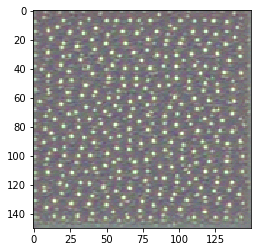

In [31]:
plt.imshow(generate_pattern('block3_conv1',0))
plt.show()

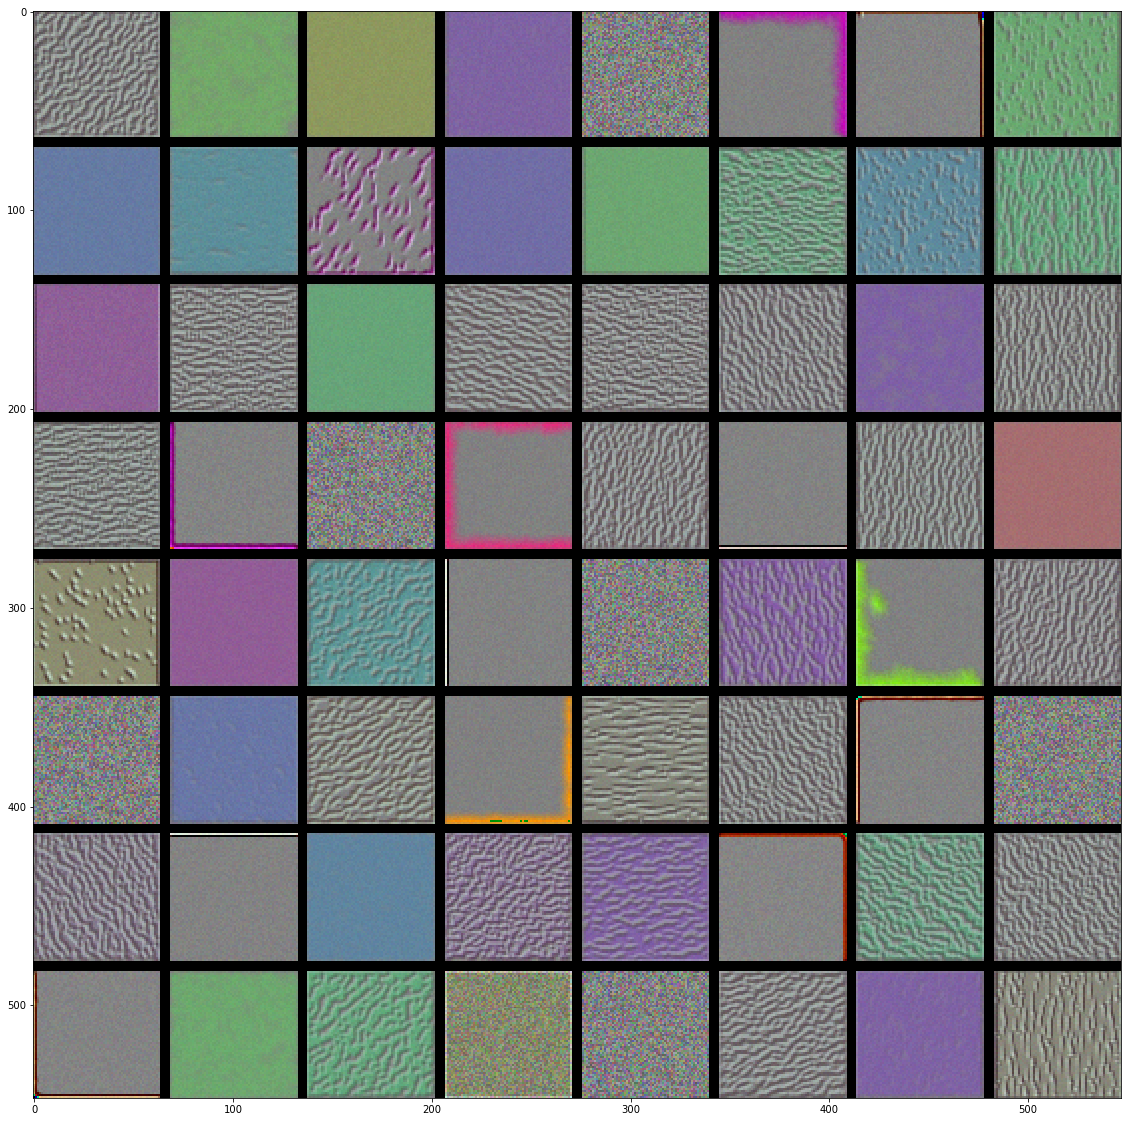

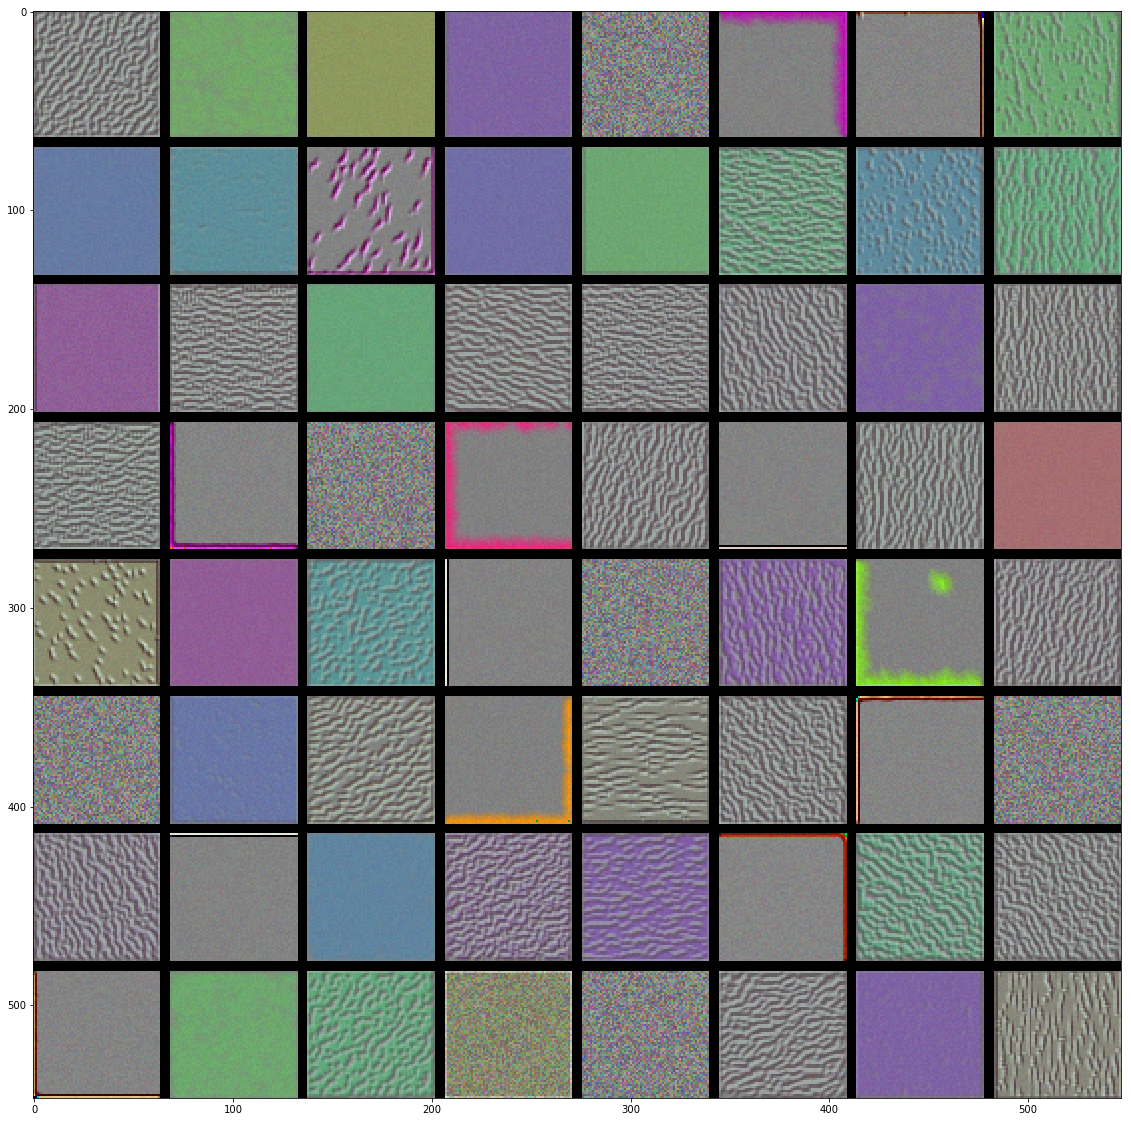

In [34]:
layer_name='block1_conv1'
size=64
margin=5
results=np.zeros((8*size+7*margin,8*size+7*margin,3))
for i in range(8):
    for j in range(8):
        filter_img=generate_pattern(layer_name,i+(j*8),size=size)
        horizontal_start=i*size+i*margin
        horizontal_end=horizontal_start+size
        vertical_start=j*size+j*margin
        vertical_end=vertical_start+size
        results[horizontal_start:horizontal_end,vertical_start:vertical_end,:]=filter_img

plt.figure(figsize=(20,20))
plt.imshow(results)
plt.show()

In [35]:
from keras.applications.vgg16 import VGG16
model=VGG16(weights='imagenet')

553467904/553467096 [==============================] - 22s 0us/step


In [41]:
from keras.preprocessing import image

from keras.applications.vgg16 import preprocess_input,decode_predictions
img_path='File_African_Bush_Elephants.jpg'
img=image.load_img(img_path,target_size=(224,224))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
x=preprocess_input(x)

OSError: cannot identify image file 'File_African_Bush_Elephants.jpg'